In [136]:
import matplotlib.pyplot as plt
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Current size: [12.0, 9.0]


# Example of Median Filtering using scipy.signal.medfilt

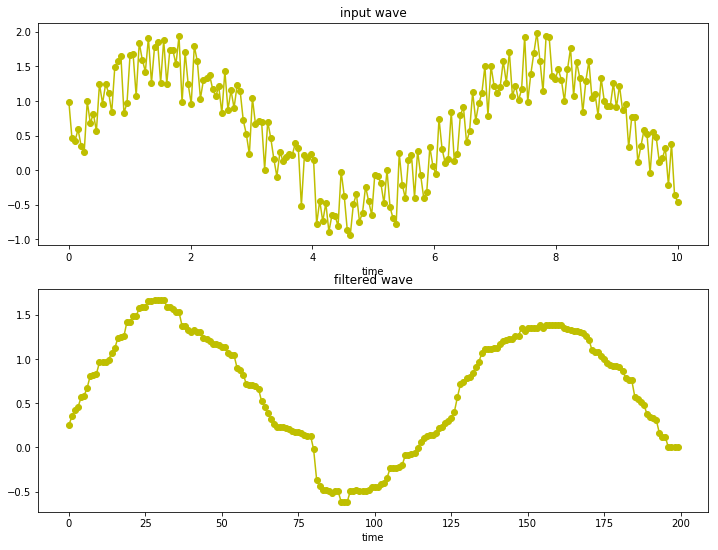

In [137]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal
 
t = np.linspace(0,10,200) # create a time signal
x1 = np.sin(t) # create a simple sine wave
x2 = x1 + np.random.rand(200) # add noise to the signal
y1 = sp.signal.medfilt(x2,21) # add noise to the signal
# plot the results
plt.subplot(2,1,1)
plt.plot(t,x2,'yo-')
plt.title('input wave')
plt.xlabel('time')
plt.subplot(2,1,2)
plt.plot(range(200),y1,'yo-')
plt.title('filtered wave')
plt.xlabel('time')
plt.show()

# Example of using the medfilt on actual sample data

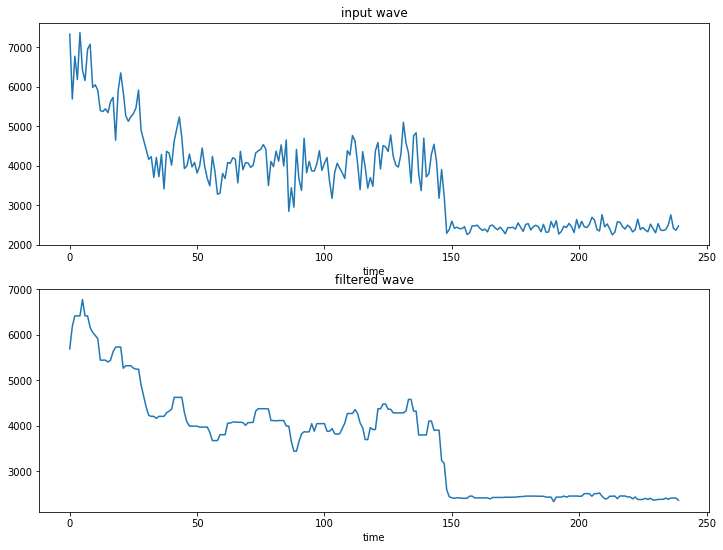

In [138]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

kernel_size= 7                                 # kernel size - this determines how wide it seeks for the median
zignal = np.loadtxt("wut2.txt", unpack=True)  
y1 = sp.signal.medfilt(zignal,kernel_size) 

plt.subplot(2,1,1)
plt.plot(range(240),zignal)
plt.title('input wave')
plt.xlabel('time')
plt.subplot(2,1,2)
plt.plot(range(240),y1)
plt.title('filtered wave')
plt.xlabel('time')
plt.show()

The kernel size dictates how large of a window it looks through to calculate the median. It must be odd - this is a function of the fact that it is looking for the median. (Duh) 

It does clean up the data, but it really doesn't make things look that nice comparitively. 

# Example of Mean Filtering of Signal

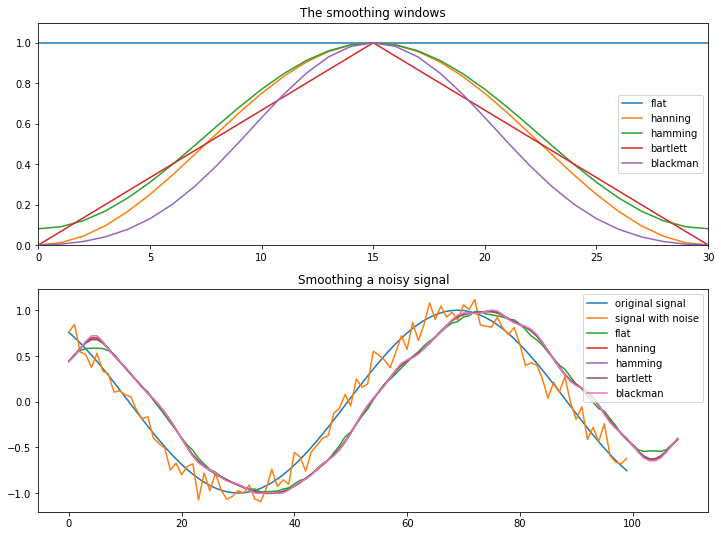

In [139]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError( "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError( "Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError( "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y




from numpy import *
from pylab import *

def smooth_demo():

    t=linspace(-4,4,100)
    x=sin(t)
    xn=x+randn(len(t))*0.1
    y=smooth(x)

    ws=31

    subplot(211)
    plot(ones(ws))

    windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']

    #hold(True)
    for w in windows[1:]:
        eval('plot('+w+'(ws) )')

    axis([0,30,0,1.1])

    legend(windows)
    title("The smoothing windows")
    subplot(212)
    plot(x)
    plot(xn)
    for w in windows:
        plot(smooth(xn,10,w))
    l=['original signal', 'signal with noise']
    l.extend(windows)

    legend(l)
    title("Smoothing a noisy signal")
    show()


if __name__=='__main__':
    smooth_demo()

This is a nice example because it shows how the windows are weighted (i believe thats what the top graph is doing).

It's a little hard to tell what the best method is. But it seems like there is a universal pull to the right of the signal for this periodic example.



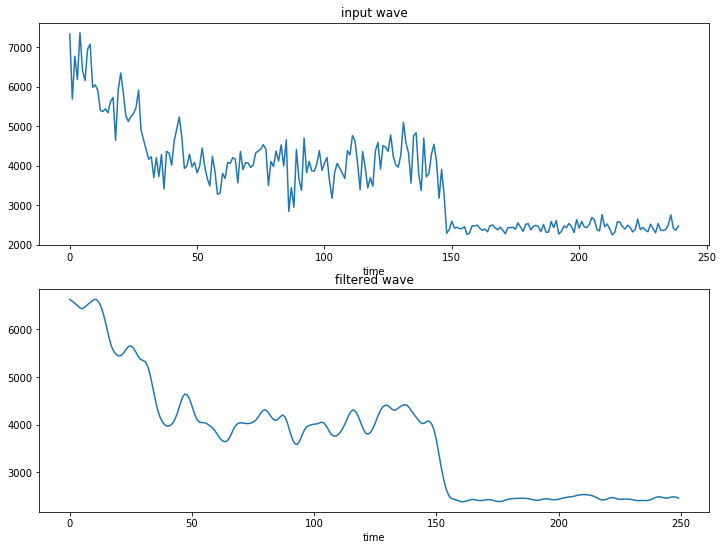

In [140]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

zignal2 = np.loadtxt("wut2.txt", unpack=True)  
y2 = smooth(zignal2)

plt.subplot(2,1,1)
plt.plot(range(240),zignal2)
plt.title('input wave')
plt.xlabel('time')
plt.subplot(2,1,2)
plt.plot(range(250),y2)
plt.title('filtered wave')
plt.xlabel('time')
plt.show()

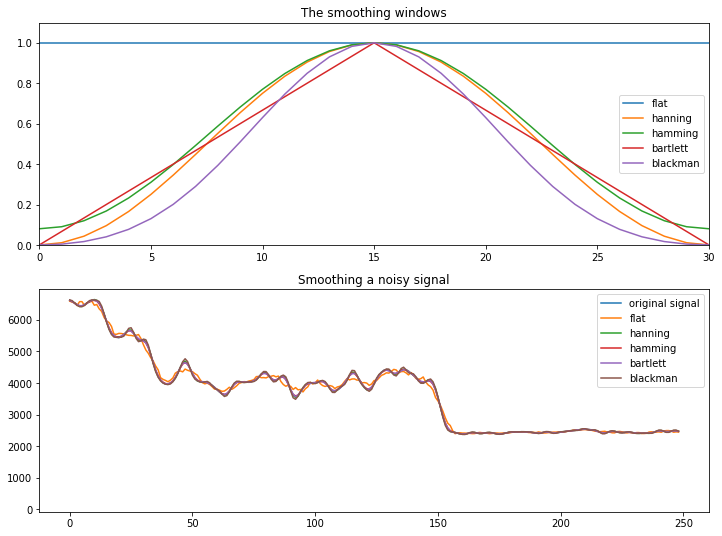

In [141]:
from numpy import *
from pylab import *

def smooth_demo():

    t=linspace(-4,6000,300)
    x=len(zignal2)
    #xn=x+randn(len(t))*0.1
    y=smooth(zignal2)

    ws=31

    subplot(211)
    plot(ones(ws))

    windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']

    #hold(True)
    for w in windows[1:]:
        eval('plot('+w+'(ws) )')

    axis([0,30,0,1.1])

    legend(windows)
    title("The smoothing windows")
    subplot(212)
    plot(x)
    #plot(xn)
    for w in windows:
        plot(smooth(zignal2,10,w))
    l=['original signal']
    l.extend(windows)

    legend(l)
    title("Smoothing a noisy signal")
    show()


if __name__=='__main__':
    smooth_demo()

It's kind of hard to see the differences in the smoothing algorithms for this example. So I will try to plot them a little more clearly - either seperately or on a single, larger plot.

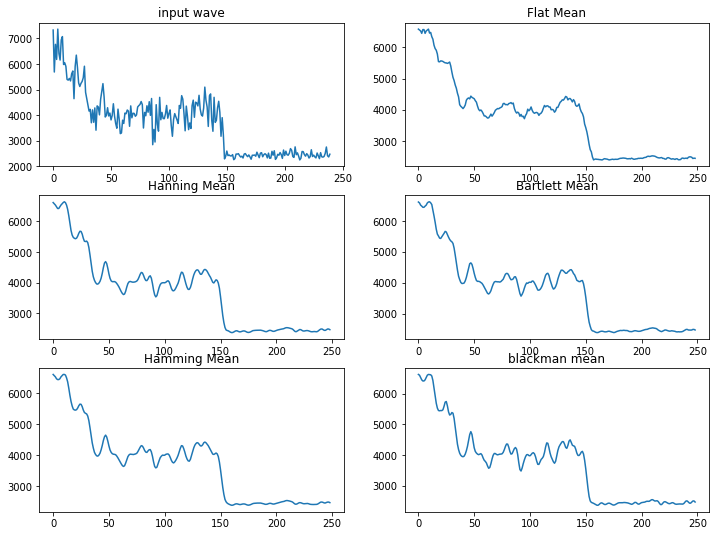

In [142]:
original = zignal2
flatMean = smooth(zignal2, 10,window='flat')
hanningMean = smooth(zignal2, 10,window='hanning')
hammingMean = smooth(zignal2, 10,window='hamming')
bartlettMean = smooth(zignal2, 10,window='bartlett')
blackmanMean = smooth(zignal2, 10,window='blackman')

plt.subplot(3,2,1)
plt.plot(range(240),original)
plt.title('input wave')

plt.subplot(3,2,2)
plt.plot(range(249),flatMean)
plt.title('Flat Mean')

plt.subplot(3,2,3)
plt.plot(range(249),hanningMean)
plt.title('Hanning Mean')

plt.subplot(3,2,4)
plt.plot(range(249),bartlettMean)
plt.title('Bartlett Mean')

plt.subplot(3,2,5)
plt.plot(range(249),hammingMean)
plt.title('Hamming Mean')

plt.subplot(3,2,6)
plt.plot(range(249),blackmanMean)
plt.title('blackman mean')

plt.show()

So the main differences are between the flat mean and then the rest of the means

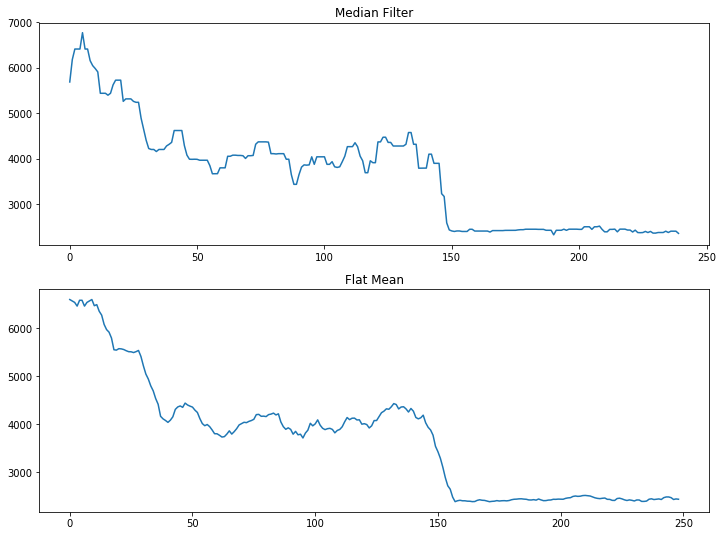

In [143]:
plt.subplot(2,1,1)
plt.plot(range(240),y1)
plt.title('Median Filter')
plt.subplot(2,1,2)
plt.plot(range(249),flatMean)
plt.title('Flat Mean')

plt.show()

The window/kernel size for the median was 11 while the flat mean is only 10. The flat mean is much more level than the median, but the other mean methods seems to look more closely like the rest of them.

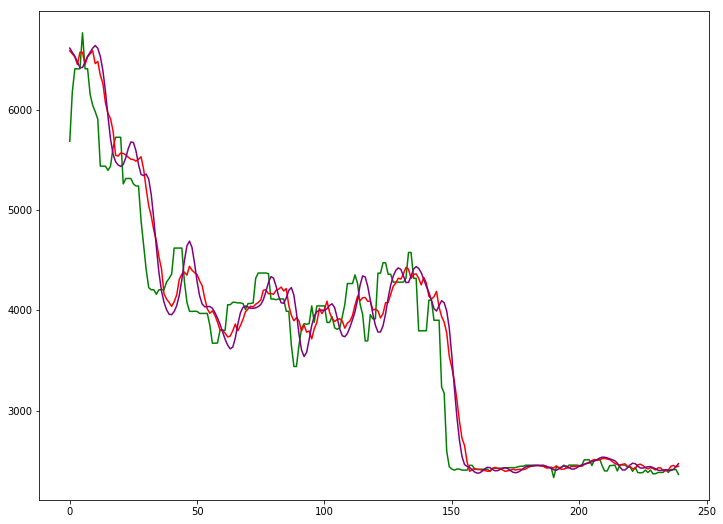

In [144]:
plt.plot(y1,'g',flatMean[:240],'r',hanningMean[:240],'purple')
plt.show()

So kind of as expected, the mean smoothed plots are shifted to the right. However, the non-flat mean does seem to represent the data better than the flat mean does. So it seems like a weighted mean or a median filter is better for smoothing the data.

However! I don't like how sinusoidal some of the bits of the data seems to be. It seems like a mean filter is, in fact, best suited for periodic data, which this bleaching data is most certainly NOT.

I wonder how the chung-kennedy filter would treat this data?

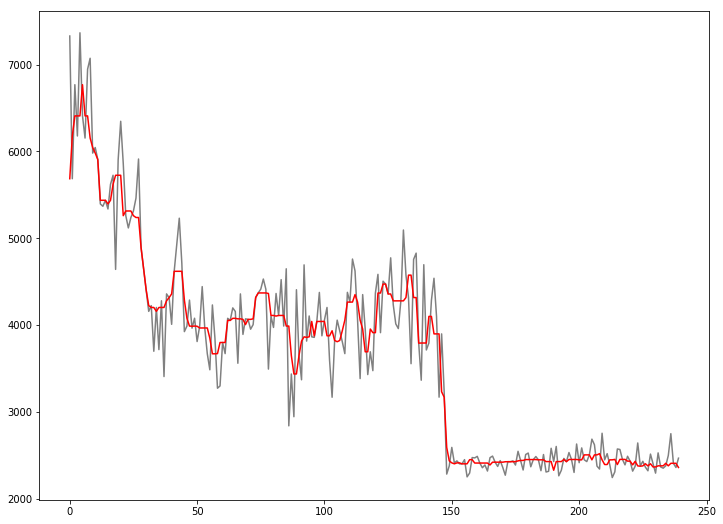

In [147]:
plt.plot(zignal,'grey',y1,'red')
plt.show()

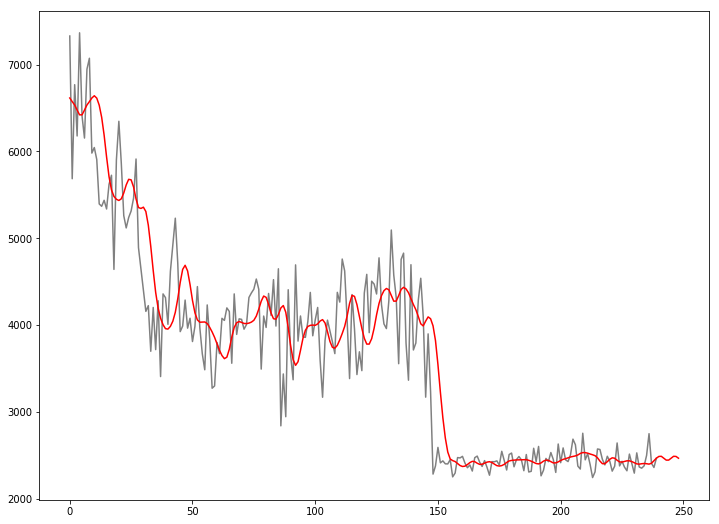

In [148]:
plt.plot(zignal,'grey',hanningMean,'red')
plt.show()

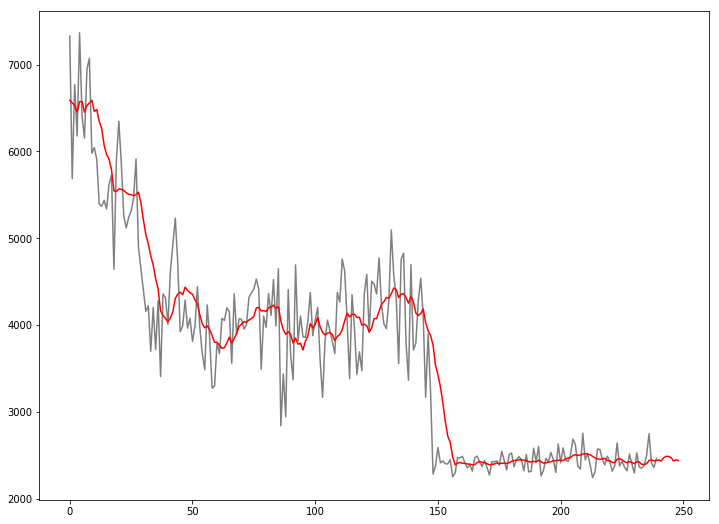

In [149]:
plt.plot(zignal,'grey',flatMean,'red')
plt.show()

Yeah, the flatMean really looks like shit when compared to the original signal. The median follows the 'trace' much better. than the others. That said, there might be some worth to them as when overlaid the mean-based smoothing seems to show levels a little better. At least the flat mean for areas where there isn't a lot of noise. e.g., from about ~25-150. However the drop right before 100 I would say is a drop down to the 1-active fluorophore state, but that gets averaged out to what I would say is the 2-fluorophore state. 

In general I believe there are ~4 fluorophores in this trace. The last bleach event is a double bleach or just two bleaches in quick procession.

# Alternative methods

There are a number of other methods/filters that can be used to smooth signal or detecting bleach events. 

I have done an analysis the the newest noise-based method (Tsekouras, et al. 2017 Molecular Biology of the Cell), but I think it over-estimates the number of active fluorophores - maybe. It also takes a long time to fully analyze the trace in addition to working better with explicit priors (single fluorphore intensity, noise, etc). 

There are other methods that I have not tried that use some t-test based algorithms (or the bayesien inference criterion) (Chen, et al. 2014 Molecular biology of the Cell). I need to do some more reading about them and can try to play with them as well. 


### Colocalization
There is also the colocalization analysis as a means of trying to determine the rate/quantity of heterodimers in a sample. The problem for me with this is that it won't really isolate aggregates - though I can try to calculate some sort of intensity threshold. (Discard the first 10% and last 10% of intensity of each peaks and say that they are aggregates or single particles?

### Bleach-Steps for maturation rates
The nice thing about getting a good algorithm for counting photobleaching events is that I can use this to backcalculate the maturation rate. I can give a distribution of n-step bleach events, and then try to write some sort of distribution generator given a maturation rate *m*